# **Here we include all the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from google.colab import files
import os
import zipfile
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.models import Word2Vec
nltk.download('punkt')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


 this is for uploading the files 

In [2]:
data_to_load = files.upload()

Saving data.zip to data.zip
Saving city_lis.csv to city_lis.csv
Saving user.csv to user.csv
Saving job.csv to job.csv


This block has a function unzip(path,directory_name) what this does is;  it tries to unzip the file in directory_name directory.

In [3]:
def unzip(path, dir_name):
  with zipfile.ZipFile(path, 'r') as zip_ref:
      os.mkdir(dir_name)
      j=%pwd
      zip_ref.extractall(os.path.join(j,dir_name))

unzip('/content/data.zip','more')


reading the jobs.csv and user.csv file

In [4]:
df=pd.read_csv('/content/job.csv')
user=pd.read_csv('/content/user.csv')

In [5]:
#checking the null values in User.csv
is_null=user.isnull().sum()
is_null

email                  20
mobile_number          30
pwd                    83
auth                    0
username                2
user_id                 0
image_url             104
fullname               21
field_of_work          32
type_of_customer       32
timestamp              32
Company                96
work_place             96
gmail image url        71
searchkey              50
board                  96
city                   90
working days           50
age                    90
gender                 88
interested field       52
rate                   90
active for hiring      50
state                  90
location               50
district               94
language               50
qualification          90
year_of_experience     50
dob                   114
edited timestamp       84
profile_url           116
dtype: int64

# Here we plot the graph of null values to given values, where the colur purple represents values present and yellow represent values absent.

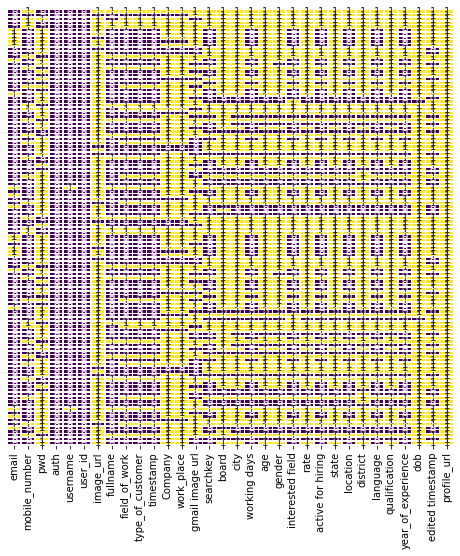

In [6]:
#plotting for user.csv
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(user.isnull(),yticklabels=False,cmap='viridis',cbar=False,annot=True, linewidths=.5, ax=ax)

# we plot similarly for jobs.csv

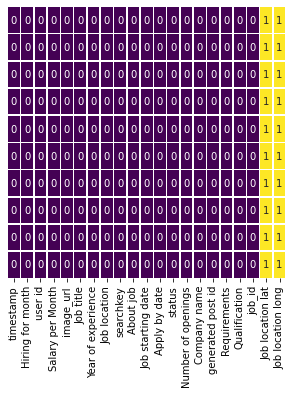

In [7]:
#plottinf for jobs.csv
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False,annot=True, linewidths=.5, ax=ax)

In [8]:
#checking the columns in user.csv
user.columns

Index(['email', 'mobile_number', 'pwd', 'auth', 'username', 'user_id',
       'image_url', 'fullname', 'field_of_work', 'type_of_customer',
       'timestamp', 'Company', 'work_place', 'gmail image url', 'searchkey',
       'board', 'city', 'working days', 'age', 'gender', 'interested field',
       'rate', 'active for hiring', 'state', 'location', 'district',
       'language', 'qualification', 'year_of_experience', 'dob',
       'edited timestamp', 'profile_url'],
      dtype='object')

# In this whole block i tried to clean the user.csv at first.


1.   At first i removed all the ',' extra spaces and square brackets.
2.   Then i removed all the useless columns whose 90% of data was filled with Nan values
3.   then individually i cleaned all the rows w.r.t their data, for example in mobile no. if there is mobile no. we gave it 1 else 0.
4.   And for dates i converted it into days and subtracting it with the maximum date.



In [9]:
user=pd.read_csv('/content/user.csv')

#----------------------------------------------


user=user.drop(['user_id','email','pwd','image_url','Company','work_place','dob','profile_url','gmail image url', 'searchkey','board'],axis=1)
#################################################
# removing extra spaces and columns
for i in user.columns:
  if type(user[i].loc[0])=='str':
    user[i]=user[i].apply(lambda x: x.replace(',',' ').replace('  ',' ').strip('[').strip(']').lower())

#################################################
# keeping 1 if mobile no. is present and 0 if mobile no. is not present
user.mobile_number=user.mobile_number.fillna(-9999)
for i in range(len(user.mobile_number)):
  if user.mobile_number[i] < 0:
    user.mobile_number[i]=0.0
  else:
    user.mobile_number[i]=1.0

########################################
# if author is following its respective values is given (the value is after -> in the comment below)
''' #Auth  #val_Count   -> #Value given
    gmail       45      -> 5
    email       35      -> 4
    phone       20      -> 3
    facebook    12      -> 2
    mail         4      -> 1  '''
user.auth=user.auth.fillna('None')
x=user.auth.value_counts()
idx=x.index
d=[]
for i in idx:
  d.append(i)
#print(d)
for i in range(len(user.auth)):
  if user.auth[i] is 'None':
    user.auth[i]=0
  else:
    user.auth[i]=float(len(d)-int(d.index(user.auth[i])))

##########################################
# if there is a username then 1 else 0

user.username.fillna(0.0)
for i in range(len(user.username)):
  if user.username[i] == 0.0:
    pass
    #print('passed')
  else:
    user.username[i] = 1.0

###########################################
#if fullname is given the 1 else 0
user.fullname=user.fullname.fillna('no')
for i in range(len(user.fullname)):
  if user.fullname[i]=='no':
    user.fullname[i]=0.0
  else:
    user.fullname[i]=1.0

############################################
# have to do something (still figuring out)
user.field_of_work=user.field_of_work.fillna('na')
user.field_of_work.value_counts()
user.field_of_work=user.field_of_work.apply(lambda x: re.sub("'|[|]","",x).strip('[').strip(']') )

###########################################

user.type_of_customer=user.type_of_customer.fillna(0.0)
#filled value coresponding to the below dictionary
d={ 'get hire':1, 'hire': 1 , 'get hired':1 }
user=user.replace({'type_of_customer': d})

##########################################
#filled the diffrence of firest date vs the other dates in terms of dates and converted it into float

user.timestamp=user.timestamp.apply(lambda x: str(x).split(',')[0].strip('Timestamp(seconds='))
user.timestamp=user.timestamp.apply( lambda x: 0  if x is '' else int(x) )
user.timestamp=user.timestamp.apply( lambda x: int(user.timestamp.median()) if x is 0 else x )
user.timestamp=user.timestamp.apply(lambda x: pd.Timestamp(x, unit='s') )
user.timestamp=user.timestamp.apply(lambda x: abs(float(str(user.timestamp[0]-x).split('days')[0])))

###############################################

#filled the city with 0.0 if not given else 1.0

user.city=user.city.fillna('')
user.city=user.city.apply(lambda x: 0.0 if x is '' else 1.0 )

#############################################
# the value are set as the no. of days a person ha s filled like if MON,TUE,THU then there are 2 commas means three values
user['working days']=user['working days'].fillna('')
user['working days']=user['working days'].apply(lambda x: str(x).strip('[').strip(']').count(',') + 1 if x != '' else 0 )

#############################################

#for all the age values not given we fill them with the meadian age value

user.age=user.age.fillna(user.age.median()) 

#############################################
#filling us all the respective gender values with 0, 1 and -1

user.gender=user.gender.fillna(-1)
user.gender=user.gender.apply(lambda x: str(x).lower())
di={'-1':0 ,'male':1, 'female':-1 }
user=user.replace({'gender': di})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to b

In [10]:
user

,mobile_number,auth,username,fullname,field_of_work,type_of_customer,timestamp,city,working days,age,gender,interested field,rate,active for hiring,state,location,district,language,qualification,year_of_experience,edited timestamp
0,0.0,4,1,0,na,0.0,0.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,1,1,Service,1.0,1.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,5,1,1,na,0.0,0.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4,1,0,na,0.0,0.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1,1,0,na,0.0,0.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.0,3,1,1,driving,1.0,1.0,1.0,7,32.0,1,[],16000.0,Yes,maharashtra,['mumbai'],Sion,"['hindi ', 'marathi']",7th,['15'],"Timestamp(seconds=1594970480, nanoseconds=7126..."
112,1.0,2,1,1,out work / office,1.0,9.0,1.0,6,32.0,1,['out door '],18000.0,Yes,MAHARASHTRA,['ghatkopar'],ghatkopar,"['gujarati ', 'hindi ', 'English ']",9,['8'],"Timestamp(seconds=1595599911, nanoseconds=9506..."
113,0.0,4,1,0,na,0.0,0.0,0.0,0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1.0,5,1,1,Mechanic,1.0,10.0,1.0,6,22.0,1,['Mechanical'],15000.0,Yes,Maharashtra,['Pune'],Pune,"['Marathi', 'English', 'Hindi']",B. com and ITI in Mechanic Motor Vehicle,['1'],"Timestamp(seconds=1595687061, nanoseconds=9402..."


User.csv after the filtering of half the datas

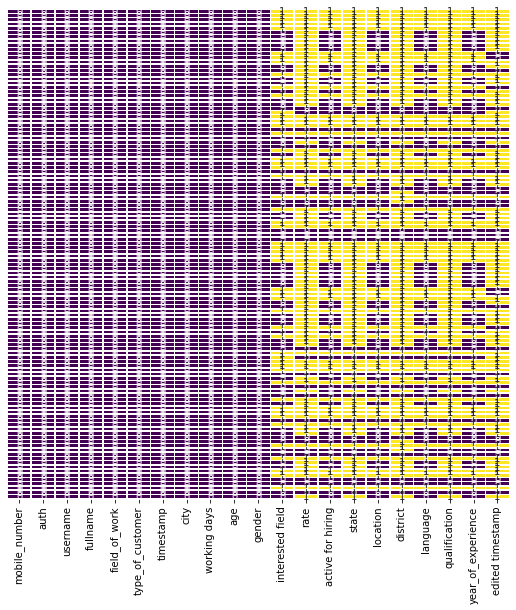

In [13]:
fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(user.isnull(),yticklabels=False,cmap='viridis',cbar=False,annot=True, linewidths=.5, ax=ax)  

 **This is a class wordy that converts job or professional words into vector using an external dataframe from naukri.com and later these vecotrs are used for extrating numarical features in the Jobs.csv dataset for clustering**

In [12]:
class wordy:
  def __init__(self):
    self.model=None

  def create_word_to_vec(self):
    
    print('word to vec forming: ')

    data=pd.read_csv('/content/more/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')

    wv=data[['Job Title','Key Skills','Role Category','Functional Area','Industry','Role']]

    wv=wv.fillna('')
    
    wv['Key Skills']=wv['Key Skills'].apply(lambda x: str(x).replace('|',''))
    
    wv['Functional Area']=wv['Functional Area'].apply(lambda x: x.replace(',',''))
    
    wv['Industry']=wv['Industry'].apply(lambda x: x.replace(',',''))

    print('==',end='>')

    arr=[]
    for i in range(len(wv)):
      x=(wv.iloc[i][0]+' '+wv.iloc[i][1]+' '+wv.iloc[i][2]+' '+wv.iloc[i][3]+' '+wv.iloc[i][4]+' '+wv.iloc[i][5]).lower()
      x=re.sub('\[[0-9]"\]',' ',x)
      x=re.sub('\d',' ',x)
      x=re.sub('\s+',' ',x)
      arr.append(x)
    print('==',end='>')
    sentences=[nltk.word_tokenize(i) for i in arr]
    print('==',end='>')
    for i in range(len(sentences)):
      sentences[i]=[word for word in sentences[i] if word not in stopwords.words('english')]
    print('==',end='>')
    self.model=Word2Vec(sentences,min_count=1,size=1)
    ########################################################### CAN BE DELETED JUST FOR SHOW--down
    print('=>\ncompleted')

  def get_vec(self,word=''):
    if self.model is None:
      return ('model not formed please call: wordy.create_word_to_vec() ')    
    try:
      x=self.model.wv[word]
      return x[0]
    except:
      return 0.5

  def get_model(self):
    if self.model:
      return self.model
    else:
      print('model not formed please call: wordy.create_word_to_vec()')

# Now we come to the main Documnet that is Jobs.csv



*   at first we drop all the unrequired columns
*   the we change the timestamp values to hours by subtracting it with the maximum timestamp value 


*   for salary we choose the minimum salary of a person that he/ she has listed 
*   we make the year of experience column cleaner by removing characters and alphabets by using the ch(x) function
*   for status we gave open as -> 1 and ->0 for close
*   we changed qualification to no. by counting the no. of commas assuming as the no. of qualifications one had enter.
*  For city we uploaded another city.csv and cleaned that file further we gave a score to each city with value , in accordace to their population. Later compared the city in jobs.csv with city.csv and maked the score attached.
#### For city i have used ***y=(20/x)*** as a fuction so that value stays between a limit and it may not go very up or down the the whole fuction becomes ***y=(20/x) - z*** to see the fuction click [here](https://www.google.com/search?rlz=1C1CHBD_enIN894IN895&sxsrf=ALeKk023pu9vQvanAQYWZ0dpLw-2Ug1QWw%3A1599882619675&ei=e0VcX_bhKPid4-EPj5KXyAs&q=y%3D20%2Fx&oq=y%3D20%2Fx&gs_lcp=CgZwc3ktYWIQAzICCAAyBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBggAEAUQHjIGCAAQBRAeOgcIIxDqAhAnOgQIABBDOggIABCxAxCDAToFCAAQsQM6BAgjECc6AggmOgYIABAKEB5QubafAliR2p8CYMPhnwJoAXAAeACAAecCiAGDCZIBBzAuNS4wLjGYAQCgAQGqAQdnd3Mtd2l6sAEKwAEB&sclient=psy-ab&ved=0ahUKEwi2i-mZ2-LrAhX4zjgGHQ_JBbkQ4dUDCA0&uact=5)






In [27]:

df=pd.read_csv('/content/job.csv')

date=df['Apply by date'][0]

df=df.drop(['Job location lat','Job starting date','Job location long','generated post id','searchkey','image_url','user id','job_id','Company name','Apply by date'],axis=1)

df=df.iloc[:-2]
#######################################################################
df.timestamp=df.timestamp.apply(lambda x: str(x).split(',')[0].strip('Timestamp(seconds='))
df.timestamp=df.timestamp.apply(lambda x: 0  if x is '' else int(x))
df.timestamp=df.timestamp.apply(lambda x: int(user.timestamp.median()) if x is 0 else x )
df.timestamp=df.timestamp.apply(lambda x: pd.Timestamp(x, unit='s'))
m=df.timestamp.max()
df.timestamp=df.timestamp.apply(lambda x: m-x)
df.timestamp=df.timestamp.apply(lambda x: x.days*24 + (x.seconds/60)/60)
#########################################################################
df['Salary per Month']=df['Salary per Month'].apply(lambda x: float(str(x).replace('k','000').partition('-')[0])/1000 )

########################################################################
def ch(x):
  x=x.split('-')
  x="".join(x)
  x=re.sub('\D',"",x)
  return x

df['Year of experience']=df['Year of experience'].apply(lambda x: float(ch(x)))

#########################################################################
d={ 'open':1.0, 'close': 0.0 }
df=df.replace({'status': d})

#################################################

df['Qualification']=df['Qualification'].apply(lambda x: float(x.count(','))+1 )

###############################################################################################

city=pd.read_csv('/content/city_lis.csv')
#clean the city.csv file 
city=city.drop(['State','Type','Population class','Type'],axis=1)
city['Name of City']=city['Name of City'].apply(lambda x: x.lower())
city['Population (2011)']=city['Population (2011)'].apply(lambda x: float(re.sub(',','',x)))
# assinging value sto each city w.r.t the population of the city and storing in  a dictionary
k=[]
dic={}
cit_lis=[]
for i in range(len(city)):
  v=city.iloc[i][1]
  if v >= 10000:
    m= 4
  if v >= 20000:
    m=3
  if v >= 50000:
    m=2
  if v >= 100000:
    m=1
  else :
    m=5
  cit_lis.append(city.iloc[i][0])
  dic.update({city.iloc[i][0] : m })

def jo(x):
  x=x.split(',')
  sum=0
  t=[]
  for i in x:
    p=i.split('(')[0].strip(' ')
    t.append(p)
  for i in t:
    for j in i.split():
      j=j.lower()
      if j in cit_lis:
        sum+=dic[j]
  if sum==0:
    return 10
# here we are using this such that the value does no ecceed or decrease a limit we want it to be in a reage
# the equation of given fuction below can be seen here-> https://www.google.com/search?rlz=1C1CHBD_enIN894IN895&sxsrf=ALeKk023pu9vQvanAQYWZ0dpLw-2Ug1QWw%3A1599882619675&ei=e0VcX_bhKPid4-EPj5KXyAs&q=y%3D20%2Fx&oq=y%3D20%2Fx&gs_lcp=CgZwc3ktYWIQAzICCAAyBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBAgAEB4yBggAEAUQHjIGCAAQBRAeOgcIIxDqAhAnOgQIABBDOggIABCxAxCDAToFCAAQsQM6BAgjECc6AggmOgYIABAKEB5QubafAliR2p8CYMPhnwJoAXAAeACAAecCiAGDCZIBBzAuNS4wLjGYAQCgAQGqAQdnd3Mtd2l6sAEKwAEB&sclient=psy-ab&ved=0ahUKEwi2i-mZ2-LrAhX4zjgGHQ_JBbkQ4dUDCA0&uact=5
  return (20/sum)-len(t)

################################################################
df['Job location']=df['Job location'].apply(lambda x: jo(x))
#############################################################
# Now for job title and about job i have created a word to vec from a preexisting dataset from naukri.com
#with that information once the word to vect for specific word was created (here ecah vecto in 1 dimesional)
#we replace the word in 'job title' and 'about job' woth their specific vector and if vector is not available
#the surely it means the work is not much in demand thus the vector we get is zer

#so for multiole words in a block we take avergae of vectors of each word in block in do_it(x) funtion 

w=wordy() #load the wordy class
w.create_word_to_vec() #this creates the word to vector

#this function averages out the vector value for each block
def do_it(x):
  x=x.lower().split()
  c=0
  sum=0
  for j in x:
    c+=1
    sum+=w.get_vec(j)#here w.do(j) gets the vector for string j
  return sum/c 

df['Job title']=df['Job title'].apply(lambda x: do_it(x))

###################################################################


for i in range(len(df['About job'])):
  sentence=df['About job'][0]
  sentence=sentence.replace('  ','').split(',')

  for i in range(len(sentence)):
    sentence[i]=sentence[i].replace('  ','').replace('.','').lower().split() 
    sentence[i]=[word for word in sentence[i] if word not in stopwords.words('english') ] 
    sentence[i]=' '.join(sentence[i]) 
    df['About job'][i]=sentence[i] 

df['About job']=df['About job'].apply(lambda x: do_it(x))

####################################################
def req(x):
  di={'they would have to stay near our plant':4 ,'no':0}
  x=x.lower()
  try:
    return di[x]
  except:
    return -2

df['Requirements']=df['Requirements'].apply(lambda x: req(str(x)))


In [28]:
df

,timestamp,Hiring for month,Salary per Month,Job title,Year of experience,Job location,About job,status,Number of openings,Requirements,Qualification
0,5.176389,12,9.0,0.500000,1.0,16.0,1.397087,1.0,15,4,2.0
1,0.000000,12,8.0,0.941291,3.0,1.0,0.500000,1.0,10,-2,1.0
2,4.981944,24,10.0,0.732973,1.0,16.0,1.694868,1.0,15,0,2.0
3,5.043333,24,9.0,2.096074,1.0,16.0,1.977778,1.0,15,4,2.0
4,5.353889,12,9.0,0.500000,1.0,16.0,0.815322,1.0,25,0,1.0
5,0.050278,24,9.0,0.828814,1.0,1.0,0.979432,1.0,10,0,3.0
6,5.107778,12,9.0,2.865462,1.0,16.0,1.079776,1.0,25,4,2.0
7,4.832222,12,9.0,0.500000,3.0,16.0,2.093707,1.0,15,4,1.0


In [77]:
h=df.drop(['timestamp','Hiring for month'],axis=1)
h

,Salary per Month,Job title,Year of experience,Job location,About job,status,Number of openings,Requirements,Qualification
0,9.0,0.500000,1.0,16.0,1.397087,1.0,15,4,2.0
1,8.0,0.941291,3.0,1.0,0.500000,1.0,10,-2,1.0
2,10.0,0.732973,1.0,16.0,1.694868,1.0,15,0,2.0
3,9.0,2.096074,1.0,16.0,1.977778,1.0,15,4,2.0
4,9.0,0.500000,1.0,16.0,0.815322,1.0,25,0,1.0
5,9.0,0.828814,1.0,1.0,0.979432,1.0,10,0,3.0
6,9.0,2.865462,1.0,16.0,1.079776,1.0,25,4,2.0
7,9.0,0.500000,3.0,16.0,2.093707,1.0,15,4,1.0


**here we make the dataframe with one hot encoding for job title**

In [78]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [1])], 
                                      remainder='passthrough')
h=pd.DataFrame(columnTransformer.fit_transform(h), dtype = np.str) 
h

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,16.0,1.3970871766408284,1.0,15.0,4.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0,1.0,0.5,1.0,10.0,-2.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0,16.0,1.6948677469044924,1.0,15.0,0.0,2.0
3,0.0,0.0,0.0,0.0,1.0,0.0,9.0,1.0,16.0,1.9777783393859862,1.0,15.0,4.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,16.0,0.8153216224163771,1.0,25.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,1.0,0.9794322084635496,1.0,10.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,16.0,1.0797755733753245,1.0,25.0,4.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,16.0,2.0937069257100425,1.0,15.0,4.0,1.0


# Clustering withour scaling

**clustering withour sclaing the values**

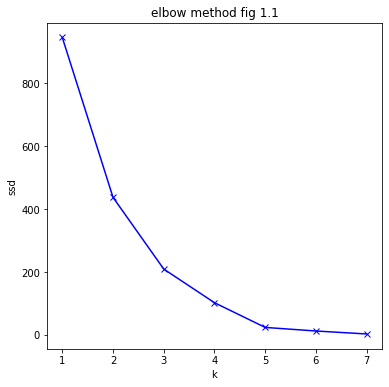

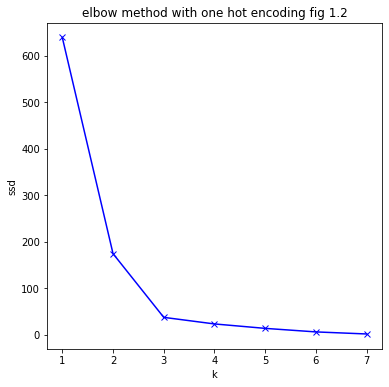

In [45]:
#scalar = MinMaxScaler()
#scaled_data = scalar.fit_transform(x)
#scaled_data
ssd=[]
K=range(1,8)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df)
    ssd.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K,ssd,'bx-')
plt.xlabel("k")
plt.ylabel('ssd')
plt.title('elbow method fig 1.1')
plt.show()
############# NOW THE ONE WITH ONE HOT ENCODING BUT WITHOUT SCALING
ssd=[]
K=range(1,8)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(h)
    ssd.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K,ssd,'bx-')
plt.xlabel("k")
plt.ylabel('ssd')
plt.title('elbow method with one hot encoding fig 1.2')
plt.show()

**here we do Kmeans clustering with a dataframe which does not have one hot ecoding**

In [44]:
#[1, 0, 2, 2, 1, 0, 1, 1]
km=KMeans(n_clusters=3, max_iter=300)
km=km.fit(df)
print('CLUSTERS FORMED ARE:-')
km.labels_
#here the distribution is done w.r.t to the jobs the person has rather than 
#the utmost people to give interviews

CLUSTERS FORMED ARE:-


array([0, 1, 2, 2, 0, 1, 0, 0], dtype=int32)

**here we do Kmeans clustering with a dataframe which  have one hot ecoding**

In [43]:
#here we take 3 cluster 
km=KMeans(n_clusters=3, max_iter=300)
km=km.fit(h)
final=km.labels_
print('CLUSTERS FORMED ARE:-')
final

CLUSTERS FORMED ARE:-


array([1, 0, 1, 1, 2, 0, 2, 1], dtype=int32)

**clustering after scaling**

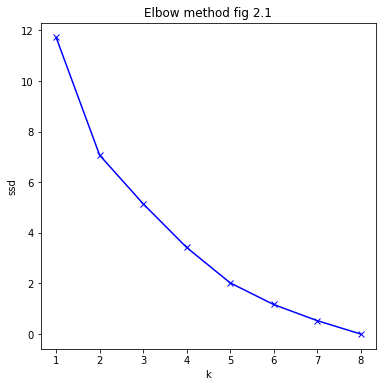

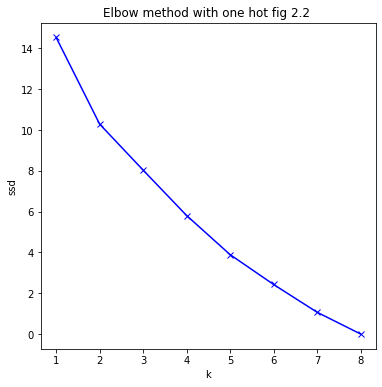

In [46]:
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(df)
scaled_data
ssd=[]
K=range(1,9)
for k in K:
    km=KMeans(n_clusters=k,max_iter=1000,random_state=85)
    km=km.fit(scaled_data)
    ssd.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K,ssd,'bx-')
plt.xlabel("k")
plt.ylabel('ssd')
plt.title('Elbow method fig 2.1')
plt.show()

scalar = MinMaxScaler()
scaled_dat = scalar.fit_transform(h)
scaled_dat
ssd=[]
K=range(1,9)
for k in K:
    km=KMeans(n_clusters=k,max_iter=1000,random_state=85)
    km=km.fit(scaled_dat)
    ssd.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K,ssd,'bx-')
plt.xlabel("k")
plt.ylabel('ssd')
plt.title('Elbow method with one hot fig 2.2 ')
plt.show()

**clustering after scling the non one hot encoded data**

In [38]:
#chosing 5 clusters
km=KMeans(n_clusters=5,max_iter=1,random_state=85)
km=km.fit(scaled_data)
km.labels_

array([4, 3, 2, 2, 4, 1, 4, 0], dtype=int32)

## clustering after one hot encoding and scaling 
**this clustering is giving the best results as 4 and 1 being to give the interview and else not to given the interview**

In [48]:
km=KMeans(n_clusters=5,max_iter=1,random_state=85)
km=km.fit(scaled_dat)
print('CLUSTERS FORMED ARE:-')
fi=km.labels_
fi

CLUSTERS FORMED ARE:-


array([1, 2, 1, 1, 4, 3, 4, 0], dtype=int32)

**So people to give interview are:**

In [76]:
data=pd.read_csv('/content/job.csv')
data=data.iloc[:-2]
inter=[]
for i in range(len(data)):
  if fi[i]==1:
    inter.append(np.array(data.iloc[i]))
for i in range(len(data)):
  if fi[i]==4:
    inter.append(np.array(data.iloc[i]))
pd.DataFrame(np.array(inter))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,"Timestamp(seconds=1594897061, nanoseconds=5745...",12,DFnrjr0KMFf5VdFuerlzDGOtBei2,9k-15k,https://firebasestorage.googleapis.com/v0/b/fr...,Deflasher,0-1,"Bawal (Haryana), Ranjangaon near Pune (Maharas...","['P', 'B', 'D']","to remove residual rubber, titanium,stainless ...",01-08-2020,01-08-2020,open,15,Polyplastics Industries India Pvt.Ltd.,2b96d660-c753-11ea-8d21-b5b4eb7703cd,They would have to stay near our plant,"ITI,Diploma",7QEDWrCS07EEtYlbjyzA,NaN,NaN
1,"Timestamp(seconds=1594897761, nanoseconds=6679...",24,DFnrjr0KMFf5VdFuerlzDGOtBei2,10000-15000,https://firebasestorage.googleapis.com/v0/b/fr...,Assemby Operators,0-1,"Bawal (Haryana), Ranjangaon near Pune (Maharas...","['P', 'B', 'A']",to put products and product components togethe...,01-08-2020,01-08-2020,open,15,Polyplastics Industries India Pvt.Ltd.,cce08d30-c754-11ea-f016-295b48f42895,no,"ITI, Diploma",JSAMoPj2NKLhVm9geEqT,NaN,NaN
2,"Timestamp(seconds=1594897540, nanoseconds=5073...",24,DFnrjr0KMFf5VdFuerlzDGOtBei2,9000-15000,https://firebasestorage.googleapis.com/v0/b/fr...,Quality Inspectors,01-Feb,"Bawal (Haryana), Ranjangaon near Pune (Maharas...","['P', 'B', 'Q']",to monitor the quality of incoming and outgoin...,01-08-2020,01-08-2020,open,15,Polyplastics Industries India Pvt.Ltd.,490e36b0-c754-11ea-fe89-d1ca6c649fd5,they would have to stay near our plant,"ITI, Diploma",SIZ53mKC5Z5VhrKgLkIq,NaN,NaN
3,"Timestamp(seconds=1594896422, nanoseconds=7237...",12,DFnrjr0KMFf5VdFuerlzDGOtBei2,9000-15000,https://firebasestorage.googleapis.com/v0/b/fr...,Painter,0-1,"Bawal (Haryana), Ranjangaon near Pune (Maharas...","['P', 'B', 'P']","To apply various finishes to buildings,rooms, ...",01-08-2020,01-08-2020,open,25,Polyplastics Industries India Pvt.Ltd.,aecde930-c751-11ea-f42b-afe895de38fc,no,10 Pass out,SKLQnzqd8isLscci7jaC,NaN,NaN
4,"Timestamp(seconds=1594897308, nanoseconds=1484...",12,DFnrjr0KMFf5VdFuerlzDGOtBei2,9000-10000,https://firebasestorage.googleapis.com/v0/b/fr...,Injection Moulding Machine Operator,0-1,"Bawal (Haryana), Ranjangaon near Pune (Maharas...","['P', 'B', 'I']",to set and operate injection Moulding Machine ...,01-08-2020,01-08-2020,open,25,Polyplastics Industries India Pvt.Ltd.,be8f0b40-c753-11ea-d131-756ab0ac4889,They would have to stay near our plant,"ITI , Diploma",YfJd5nIqdyPRgfU44mjD,NaN,NaN
